In [3]:
#https://github.com/niranjannahak/Telecom_Churn/blob/master/Telecom_Churn_Final.ipynb
#https://www.kaggle.com/code/ramjasmaurya/churn-analysis-with-95-accuracy
import urllib
import pandas as pd
#import json
import numpy as np 
#from bson import ObjectId 

In [4]:
churn = pd.read_excel('D:\Python\VS Code for Python\Telecom churn\Book1.xlsx')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
churn[churn.columns] == 'No phone service'

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
churn.MultipleLines = churn.MultipleLines.replace('No phone service','No')
churn.MultipleLines.value_counts()

No     4072
Yes    2971
Name: MultipleLines, dtype: int64

In [8]:
churn['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [9]:

churn['OnlineSecurity'].replace('No internet service','No',inplace=True)
churn['OnlineSecurity'].value_counts()

No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64

In [10]:
churn['OnlineBackup'].replace('No internet service','No',inplace=True)
churn['DeviceProtection'].replace('No internet service','No',inplace=True)
churn['TechSupport'].replace('No internet service','No',inplace=True)
churn['StreamingTV'].replace('No internet service','No',inplace=True)
churn['StreamingMovies'].replace('No internet service','No',inplace=True)

In [11]:
#with pd.ExcelWriter('Updated telecom.xlsx') as writer:  
    #churn.to_excel(writer , sheet_name= 'Sheet_1')

In [12]:
#!pip install pandas-profiling --upgrade

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [14]:
churn= churn.replace(r'^\s*$', np.nan, regex=True)

In [15]:
churn[churn['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [16]:
churn.TotalCharges = churn.TotalCharges.astype(float)

In [17]:
churn.TotalCharges = churn.TotalCharges.fillna(value = churn.TotalCharges.mean())
churn.TotalCharges.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [18]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [19]:
profile = ProfileReport(churn, title = 'Telecom EDA',minimal=True)
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
churn.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [21]:
churn[churn['tenure'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,2283.300441,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.25,2283.300441,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,2283.300441,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Mailed check,25.75,2283.300441,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,2283.300441,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,19.85,2283.300441,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Mailed check,25.35,2283.300441,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.00,2283.300441,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,One year,Yes,Mailed check,19.70,2283.300441,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,2283.300441,No


<Figure size 1440x2160 with 0 Axes>

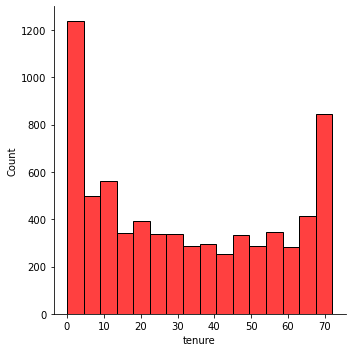

In [22]:
plt.figure(figsize= (20,30))
sns.displot(churn.tenure,color = 'red')

In [23]:
from sklearn.preprocessing import  LabelEncoder
churn.drop('customerID',axis= 1 , inplace= True)

In [24]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
churn2 = pd.get_dummies(data= churn)
churn2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1


In [26]:
cols = churn.select_dtypes(object).columns
print(cols)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [27]:
churn2 = churn2.drop(['gender_Female','Partner_No','Dependents_No','PhoneService_No','MultipleLines_No','InternetService_No','OnlineSecurity_No'],axis = 1)

In [28]:
churn2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7043 non-null   float64
 4   gender_Male                              7043 non-null   uint8  
 5   Partner_Yes                              7043 non-null   uint8  
 6   Dependents_Yes                           7043 non-null   uint8  
 7   PhoneService_Yes                         7043 non-null   uint8  
 8   MultipleLines_Yes                        7043 non-null   uint8  
 9   InternetService_DSL                      7043 non-null   uint8  
 10  InternetService_Fiber optic              7043 no

In [29]:
le = LabelEncoder()
churn3 = churn.copy()
for i in cols:
    churn3[i] = le.fit_transform(churn3[i])

In [30]:
churn3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


<AxesSubplot:xlabel='gender', ylabel='TotalCharges'>

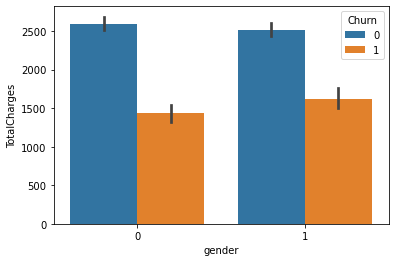

In [31]:
sns.barplot(x = churn3['gender'],y = churn3['TotalCharges'],hue= churn3['Churn'])

<AxesSubplot:>

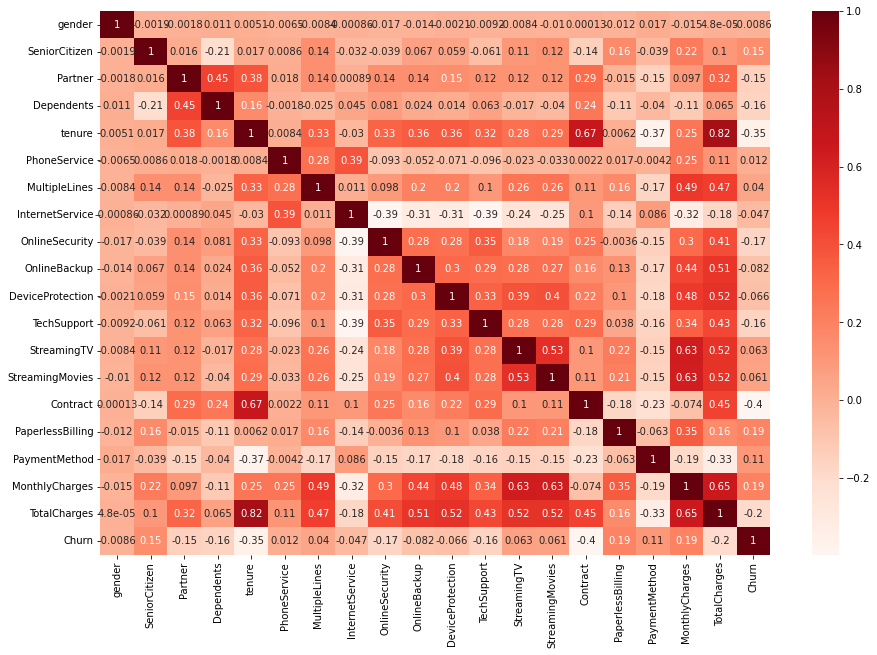

In [32]:
crr_churn = churn3.corr()
plt.figure(figsize=(15,10))
sns.heatmap(crr_churn,annot= True,cmap= "Reds")

c:\Users\riddh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OnlineBackup', ylabel='StreamingTV'>

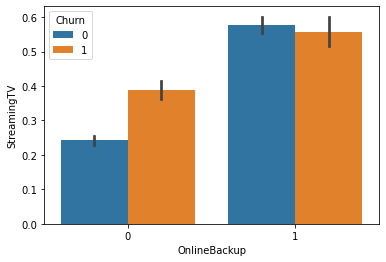

In [33]:
sns.barplot(churn3['OnlineBackup'],churn3['StreamingTV'],hue=churn3['Churn'])

c:\Users\riddh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\riddh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\riddh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


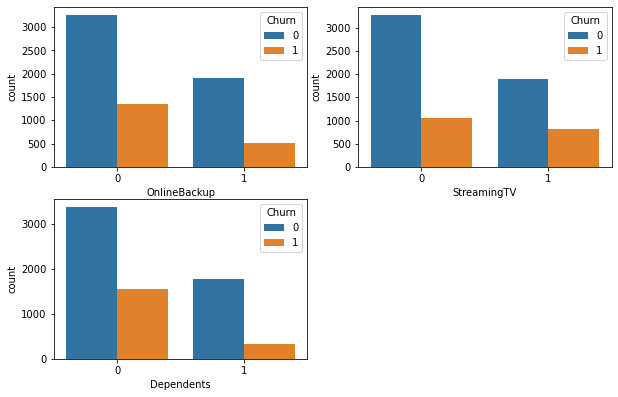

In [34]:
x = ['OnlineBackup','StreamingTV','Dependents']
enumerate(x)
plt.figure(figsize=(10,10))
for i in enumerate(x):
    plt.subplot(3,2,i[0]+1)
    sns.countplot(i[1],hue = "Churn",data=churn3)

In [35]:
churn3['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [36]:
len(churn3['Churn'])

7043

[0.2 1.2]


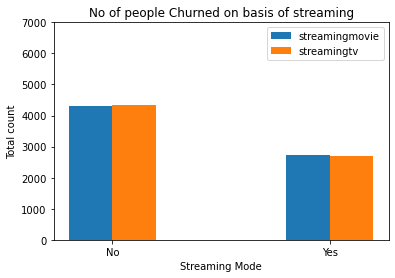

In [37]:
streamingmovie = churn3['StreamingMovies'].value_counts()
streamingtv = churn3['StreamingTV'].value_counts()
x = np.arange(len(streamingmovie))
x2 = x
w = 0.2
arr1 = plt.bar(x,streamingmovie, width =w)
x = [i+w for i in x]
arr2 = plt.bar(x,streamingtv,width=w)
item = ['No',"Yes"]
print(x2+w)
plt.xticks(x2+w/2,item)
plt.ylim(0,7000)
plt.legend([arr1,arr2],['streamingmovie','streamingtv'])
plt.xlabel("Streaming Mode")
plt.ylabel('Total count')
plt.title('No of people Churned on basis of streaming')
plt.show()






In [38]:
def countplot():
    plt.figure(figsize=(10,10))
    sns.countplot(x= churn3[i],palette= 'RdYlGn')
    plt.xlabel(i)
    plt.ylabel('Counts')
    plt.title('{i} Value Counts')
    plt.show()
    

In [39]:
streamingmovieNO= churn3[(churn3['StreamingMovies'] == 1) & (churn3['Churn'] == 0)]
streamingmovie_no = streamingmovieNO.count().iloc[0]
print(streamingmovie_no)

1914


In [40]:
streamingmovieyes= churn3[(churn3['StreamingMovies'] == 1) & (churn3['Churn'] == 1)]
streamingmovie_yes = streamingmovieyes.count().iloc[0]
print(streamingmovie_yes)

818


In [41]:
nostreamingmoviesno =  churn3[(churn3['StreamingMovies'] == 0) & (churn3['Churn'] == 0)]
nostreamingmovies_no = nostreamingmoviesno.count().iloc[0]
print(nostreamingmovies_no)

3260


In [42]:
nostreamingmoviesyes =  churn3[(churn3['StreamingMovies'] == 0) & (churn3['Churn'] == 1)]
nostreamingmovies_yes = nostreamingmoviesyes.count().iloc[0]
print(nostreamingmovies_yes)

1051


In [43]:
data = {'streamingmovie_no':[streamingmovie_no],'streamingmovie_yes':[streamingmovie_yes],'nostreamingmovies_no':[nostreamingmovies_no],'nostreamingmovies_yes':[nostreamingmovies_yes]}
df = pd.DataFrame(data = data)


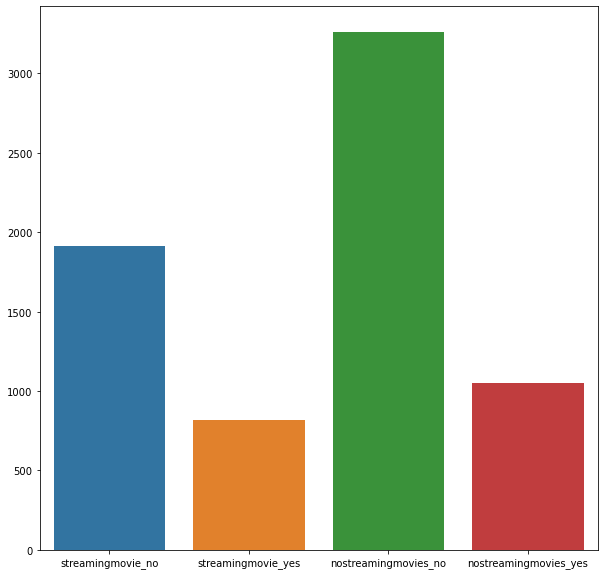

In [44]:
plt.figure(figsize= (10,10))
ax = sns.barplot(data=df)



In [45]:
x = churn3.loc[:,churn3.columns.isin(['StreamingMovies','StreamingTV'])]


<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

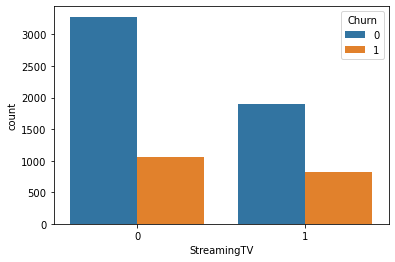

In [46]:
sns.countplot(x = x.columns[0], data= churn3,hue='Churn')



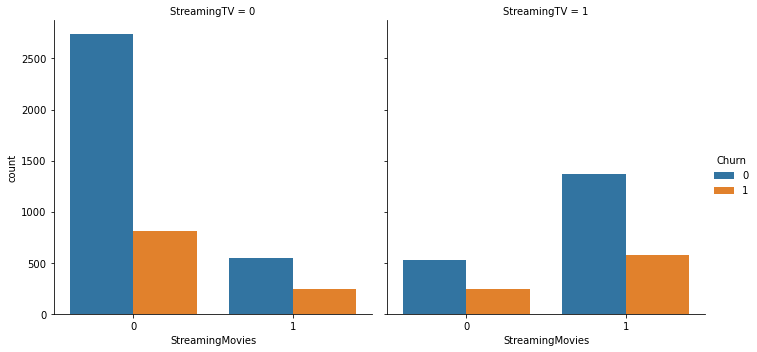

In [47]:
sns.catplot(data=churn3, x='StreamingMovies', hue='Churn', kind='count', col='StreamingTV')

In [48]:
x = churn3.loc[:,churn3.isin([0,1]).all()]
x.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'Churn'],
      dtype='object')

In [50]:
cols_01 = churn3.columns[churn3.nunique() == 2]
churn3_01 = churn3.loc[:,cols_01]
churn3_01.columns 


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'Churn'],
      dtype='object')

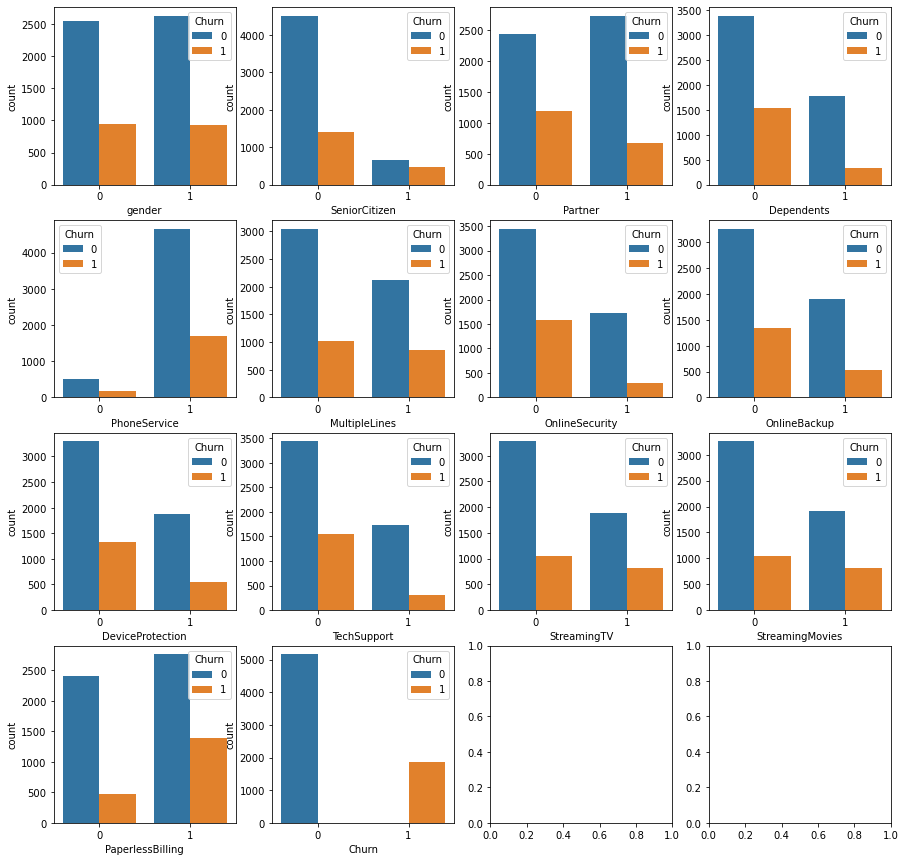

In [51]:
fig, ax = plt.subplots(4, 4, figsize=(15, 15))
ax = ax.ravel()
for i, col in enumerate(churn3_01.columns):
    sns.countplot(x=col, data=churn3_01, ax=ax[i], hue='Churn')


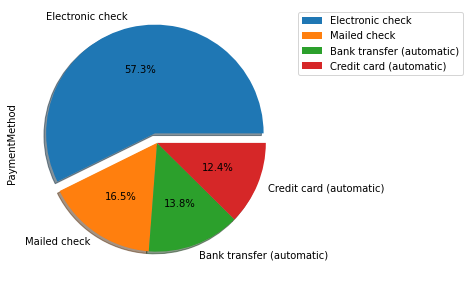

In [68]:
plt.figure(figsize=(5,5))
churn[churn['Churn'] =='Yes']['PaymentMethod'].value_counts().plot(kind= 'pie',explode = [0.09,0,0,0],legend= True,autopct='%1.1f%%',shadow=True,
pctdistance=0.6, labeldistance = 1.1)
plt.gca().set_facecolor('white')
plt.legend(bbox_to_anchor= (1,1))


# Model building

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report


In [72]:
x = churn3.drop('Churn',axis= 1)
y = churn3.Churn
print(x.shape,y.shape)

(7043, 19) (7043,)


In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(5634, 19) (1409, 19) (5634,) (1409,)


### Logistic model

In [83]:
logreg = LogisticRegression(max_iter= 1000)
scores = cross_val_score(estimator= logreg , X= x ,y=y,cv= 5, scoring='roc_auc')


score for this model is [0.85569764 0.85528172 0.8308055  0.83651811 0.83888176] and mean score of it is 0.8434369464600717


In [125]:
logreg.fit(x_train,y_train)
logreg_pred = logreg.predict(x_test)
modelscore =(logreg.score(x_train,y_train))


the fitted model score is: 0.8024494142705005


[[934 127]
 [144 204]]


Text(33.0, 0.5, 'Actual')

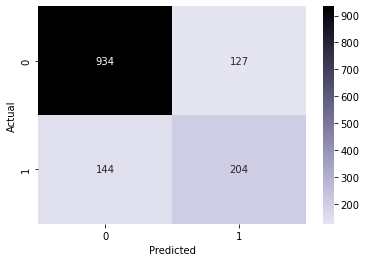

In [126]:
confmatrix = confusion_matrix(y_test,logreg_pred)
print(confmatrix)
cmap = sns.cubehelix_palette(50, hue=0.5, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(confmatrix,cmap= cmap,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [129]:
accuracy_score(y_test,logreg_pred)
precision_score(y_test,logreg_pred)
print('The accuracy score is :',accuracy_score(y_test,logreg_pred),'& The precision score is:', precision_score(y_test,logreg_pred))
print("the fitted model score is:",modelscore)
print("score for this model is {} and mean score of it is {}".format(scores,scores.mean()))

The accuracy score is : 0.8076650106458482 & The precision score is: 0.6163141993957704
the fitted model score is: 0.8024494142705005
score for this model is [0.85569764 0.85528172 0.8308055  0.83651811 0.83888176] and mean score of it is 0.8434369464600717


## Decision Tree

[[903 158]
 [151 197]]


<AxesSubplot:>

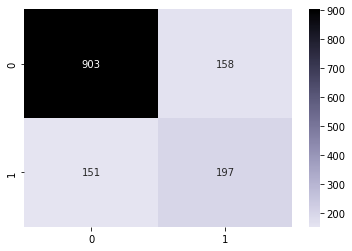

In [123]:
tree = DecisionTreeClassifier(max_depth= 9,random_state= 123, splitter= 'best',criterion= 'gini')
tree.fit(x_train,y_train)
tree_pred = tree.predict(x_test)
confmatrix = confusion_matrix(y_test,tree_pred)
print(confmatrix)
sns.heatmap(confmatrix,cmap= cmap,annot=True,fmt='d')

In [122]:
print('The accuracy score of the model is:',accuracy_score(y_test,tree_pred))
print("The precision score of this model is :",precision_score(y_test,tree_pred))
score = cross_val_score(estimator=tree,X=x,y=y ,cv = 5 ,scoring='roc_auc')
print('The scores of this model are :',score,'And the mean score is:',score.mean())
print('the score of the fitted model is :',tree.score(x_train,y_train))

The accuracy score of the model is: 0.7806955287437899
The precision score of this model is : 0.5549295774647888
The scores of this model are : [0.80150482 0.79344855 0.77159059 0.74577586 0.79906184] And the mean score is: 0.7822763321944146
the score of the fitted model is : 0.8473553425630103


## Random Forest

In [132]:
randomforest = RandomForestClassifier(n_estimators=1000,oob_score=True,n_jobs=-1,max_features='auto',random_state=50,max_leaf_nodes=30)
randomforest.fit(x_train,y_train)
random_pred = randomforest.predict(x_test)

[[968  93]
 [168 180]]


<AxesSubplot:>

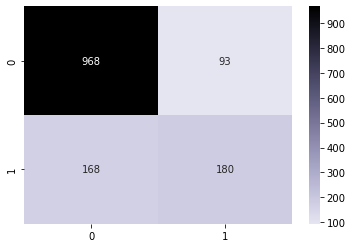

In [137]:
confmatrix = confusion_matrix(y_test,random_pred)
print(confmatrix)
cmap = sns.cubehelix_palette(hue = 0.5,light=0.9,dark=0,rot=0,as_cmap=True)
sns.heatmap(confmatrix,cmap=cmap,annot=True,fmt='d')

In [138]:
print('The accuracy score for the model is :',accuracy_score(y_test,random_pred))
print('The precission score of the model is :',precision_score(y_test,random_pred))
score = cross_val_score(estimator=randomforest,cv = 5,X=x,y=y,scoring = 'roc_auc')
print('score of the model is :',score,'and the mean score is:',score.mean())
print('The score of the fitted model is :',randomforest.score(x_train,y_train))

The accuracy score for the model is : 0.8147622427253371
The precission score of the model is : 0.6593406593406593
score of the model is : [0.85915162 0.85447054 0.83189439 0.83974952 0.84490944] and the mean score is: 0.8460351013367425
The score of the fitted model is : 0.8129215477458289


In [139]:
# for checking the feature importance 
for score,name in sorted(zip(randomforest.feature_importances_,x_train.columns),reverse=True):
    print('The Feature importance of',name,'is :',score*100,'%')

The Feature importance of Contract is : 24.03342219535551 %
The Feature importance of tenure is : 19.90363333507977 %
The Feature importance of MonthlyCharges is : 14.613782729710302 %
The Feature importance of TotalCharges is : 12.414320769919321 %
The Feature importance of InternetService is : 10.589083225756653 %
The Feature importance of PaymentMethod is : 4.310816429335769 %
The Feature importance of OnlineSecurity is : 2.781075211706989 %
The Feature importance of PaperlessBilling is : 2.6032787635077326 %
The Feature importance of TechSupport is : 2.401944134780053 %
The Feature importance of SeniorCitizen is : 1.1963763302700456 %
The Feature importance of StreamingMovies is : 0.9915516821582825 %
The Feature importance of MultipleLines is : 0.8790807086170783 %
The Feature importance of OnlineBackup is : 0.7411466960837853 %
The Feature importance of StreamingTV is : 0.7060371931541062 %
The Feature importance of Dependents is : 0.5727776971307331 %
The Feature importance of D

In [140]:
col = x_train.columns
col

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [145]:
featureimp = randomforest.feature_importances_*100

In [168]:
data = pd.DataFrame(list(zip(col, featureimp)), columns=['col', 'featureimp'])
data


,col,featureimp
0,gender,0.166530
1,SeniorCitizen,1.196376
2,Partner,0.365780
3,Dependents,0.572778
4,tenure,19.903633
5,PhoneService,0.320686
6,MultipleLines,0.879081
7,InternetService,10.589083
8,OnlineSecurity,2.781075
9,OnlineBackup,0.741147


Text(0, 0.5, 'Their importance in the model')

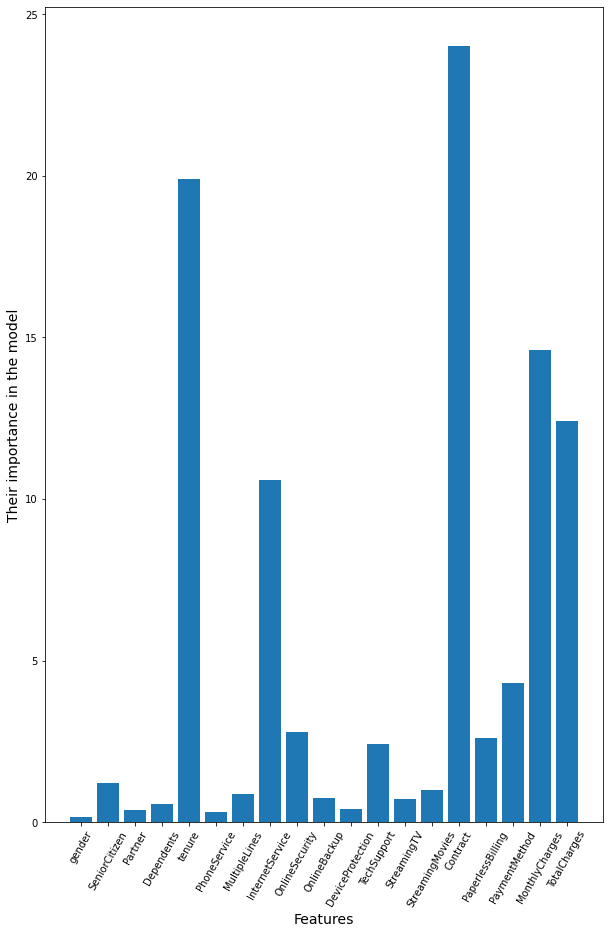

In [166]:
plt.figure(figsize=(10,15))
plt.bar( x_train.columns, randomforest.feature_importances_*100)
plt.xticks(rotation = 60)
plt.xlabel("Features",fontsize = 14)
plt.ylabel('Their importance in the model',fontsize = 14)


In [175]:
param_grid = [{'n_estimators':[100,200,300,400,500,600,700,800,900,1000],
'max_depth' : [None,4,8,9,13,15,18,19,20],
'max_features':['auto',2,4,6,10,12,19,20,None,'log2']}]
temp_rf = RandomForestClassifier(random_state=0,n_jobs=-1)
grid_search = GridSearchCV(estimator=temp_rf,param_grid=param_grid,scoring='roc_auc',cv =5, n_jobs=-1)

In [176]:
%%time
grid_search.fit(x_train,y_train)